# Abstract

# Introduction

In recent years, the field of the spatio temporal dataset has emerged, enabling the simultaneous consideration of both the time and space dimensions. The examples include consumer demand data\citep{rozemberczki2021pytorch}, wind turbine records\citep{rozemberczki2021pytorch}, neuroscience data including brain networks\citep{atluri2016brain}, traffic data like taxi GPS traces\citep{castro2013taxi}, and more. 

- STdataset 가 출현함 

Classic time-series statistical methods to analyze those kind of data already exist, but they are limited by certain conditions, such as assumptions about the data. Specifically, these classic methods are hard to account for spatio temporal correlations and are not designed to work with spatio temporal data\citep{yu2017spatio,rozemberczki2021pytorch}. 

- 근데 그건 전통적인 시계열로 분석이 어려움 

In result, when we analize spatio temporal data to use enough information, it leads to improve accuracy during using appropriate geometric deep learning frameworks.

- 그래서 GDL을 써야함
    - 접근하는 방법은 크게 전통적인 시계열방법과 GDL이 있음. 

---

However, dealing with spatio temporal datasets often presents a common challenge, which is the frequent occurrence of irregularly observed data. For instance, as highlighted by \citet{ge2019traffic}, traffic sensor data commonly suffers from missing observations due to electronic unit failures, which can significantly impact prediction accuracy. 

- 그러나 STdataset은 미싱이 있으면 동작X

The difficulty in handling irregular data is that many traditional data analysis procedures were designed for datasets with complete observations \citep{schafer2002missing}. 

- 이유1. GDL의 대부분 방법은 fully observed 되었다고 가정함.

~Second, when dealing with time-series datasets containing missing data, attempting to learn from such data can lead to challenges as it may result in the failure to capture certain time points\citep{ge2019traffic, tian2018lstm}.~

- ~이유2. -> 시계열에서 미싱이 있을 경우 분석에 어려움이 있다는 연구가 있음.~ 

That's why it's essential to transform incomplete data into complete data before conducting any learning or analysis.

- 그래서 complete data를 만들어야함. 

Therefore, we set the purpose of this paper that finds closely approciate complete data when we approach the irregularly data.

- 이 논문의 목적은 컴플릿 데이터에 가까운 값을 찾는 것임.

---

Table 1: Definitions

|Notations|Definitions or Description|
|:--:|:--:|
|${\cal G}$|Input Graph|
|$T$| the length of the time interval|
|$\cal{V}$| a set of Verteces|
|$V$|a set of an index node|
|$N$|the number of Verteces|
|$\cal{E}$|a set of undirected Edges|
|$\textbf{y}$|a graph signal, a function defined on the vertices of the graph $\cal{G}$
|$\textbf{W}$ | a weighted adjacency matrix|

To describe the geometric structures of data domain, graphs are well known as generic data representation forms\citep{shuman2013emerging}, so we interpret data on Graph domain. Table 1 indicates the descriptions of notations we use respectively. 

-  Shuman 등이 2013년에 발표한 연구에 의하면, 데이터 도메인의 기하학적 구조를 설명할 때 그래프가 일반적인 데이터 표현 형식으로 잘 알려져 있어 데이터를 그래프로 해석함.

To simply understand our method, let's consider the following simple example. Here is a sample dataset:

- Graph ${\cal G} = (\cup_{t \in {\cal T}} {\cal V}_t, \cup_{t \in {\cal T}} {\cal E}_t, \textbf{W})$ ,${\cal T}:=\{1 \text{ to } 10,000\}$
- $\cal{V}$ is a set of Verteces. ${\cal V} = \{ v_0, v_1 \}$, $|{\cal V}| = 2$, $V = \{ 0,1\}$
- $\cal{E}$ is a set of undirected Edges. ${\cal E} =\{ ( 0, 1)\}$
- a graph signal $\textbf{y}$: ${\cal V}_t \to \mathbb{R}^2$
    - node 0 $y = \cos(2t) + \cos(4t) + \cos(8t) + \epsilon$
    - node 1 $y = \cos(2t) + \cos(4t) + \epsilon$
- ${\cal Y} = \{ y_{v,t}:  t \in {\cal T}, v \in V\}$
- Define ${\cal Y} = ({\cal O} , {\cal M})$
- A missing data ${\cal M} = \{ y_{v,t_v}:  t_v \in {\cal M}_v, v \in V \}$
    - missing rate on node 0 = random missing 60%
    - missing rate on node 1 = random missing 60% + block missing $1600$ to $4000$
- A observed data ${\cal O} = \{ y_{v,t_v}:  t_v \in {\cal O}_v, v \in V \}$

For learning data on example, we used GConvGRU. After updating the graph signal set $\cal{Y}$ 200 epochs, we achieved meaningful outcomes(animation link).

figure 1

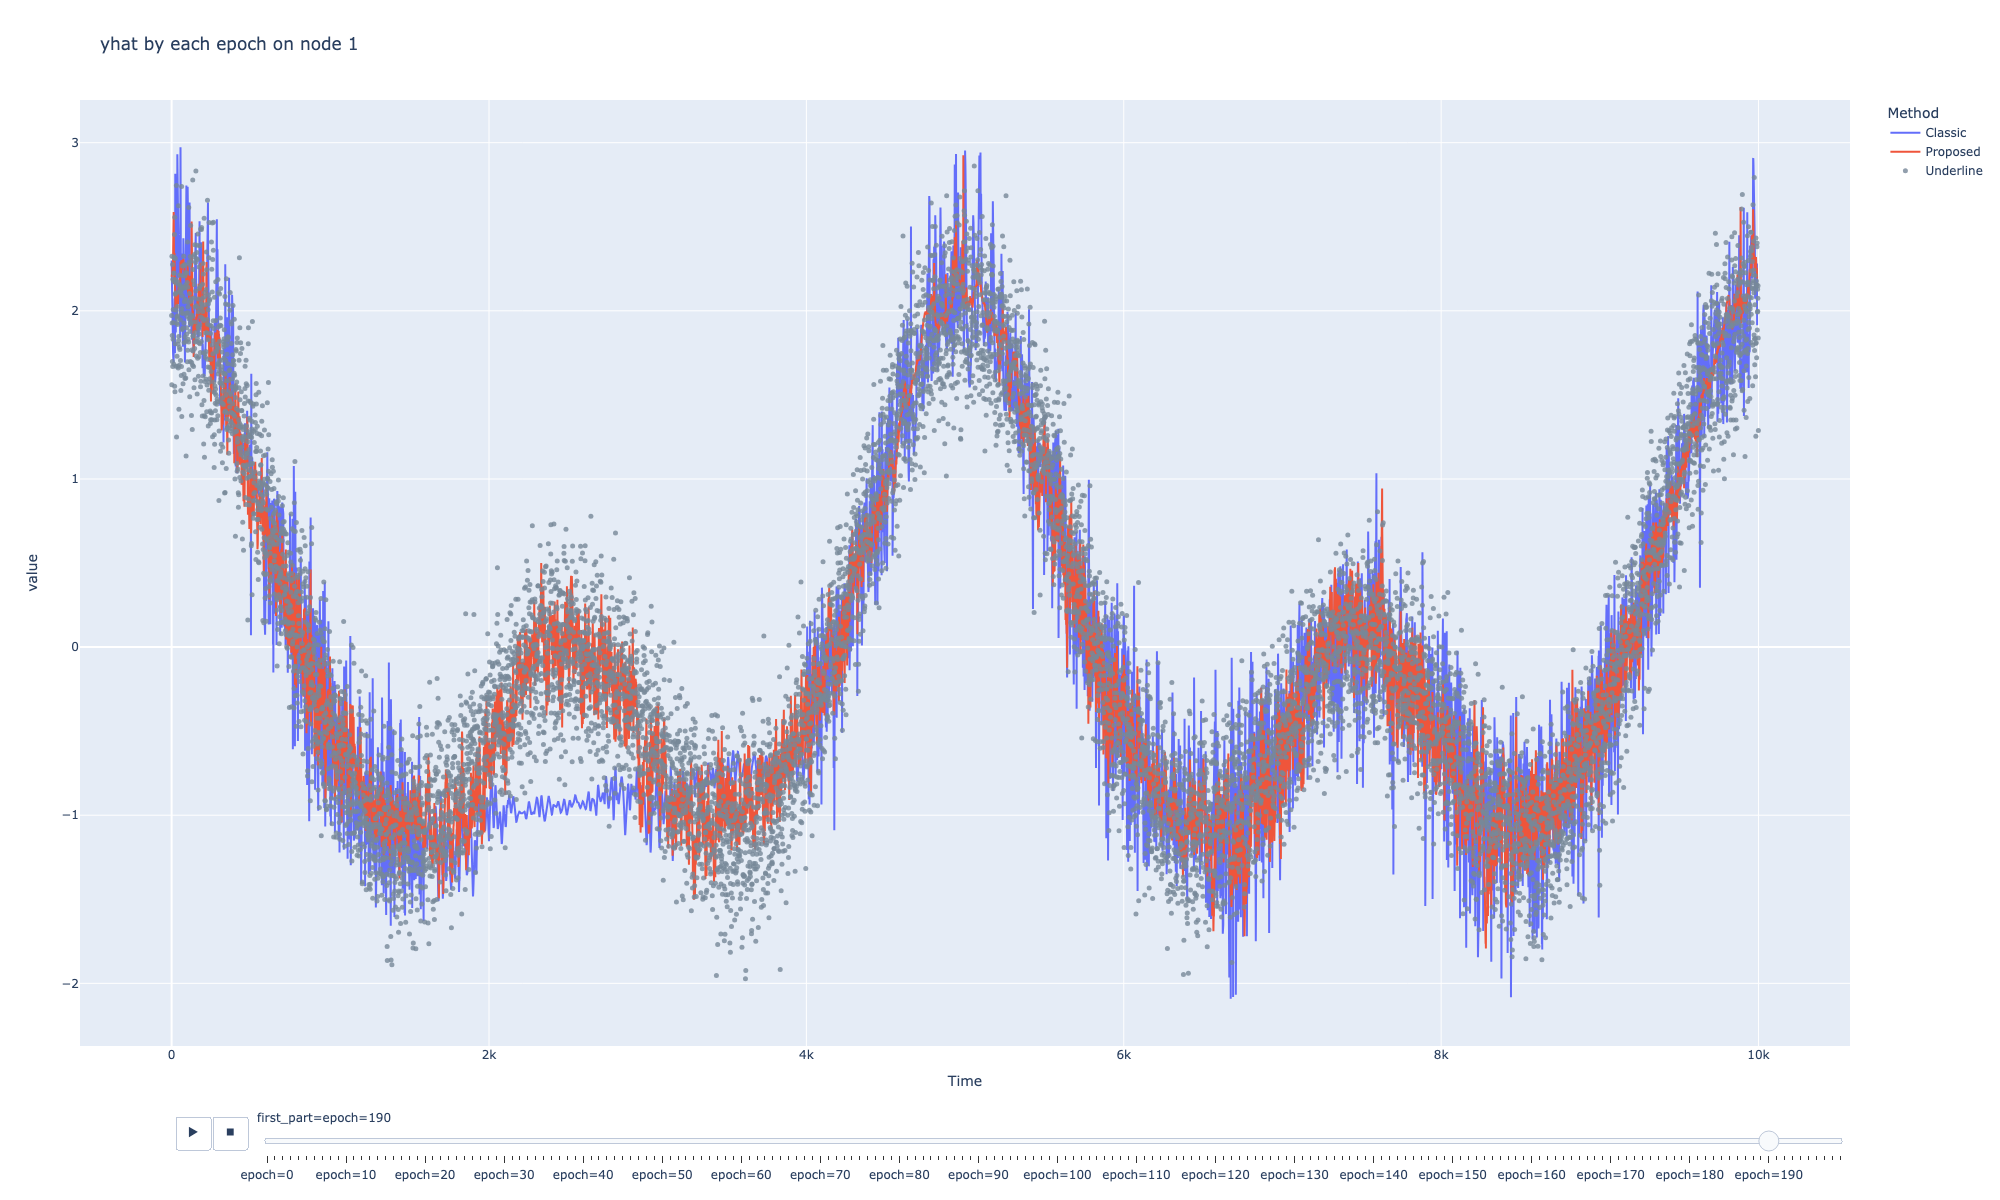**Contributions**

In this paper, we expect to contribute as follows:

- we can appropriately predict data when we get spatio temporal dataset with higher missing rate. 

우리는 높은 미싱 비율을 가진 stdata를 만날때마다 적절히 대처 가능

# Related work

 \textbf{Traditional methods} When observed data is incomplete data, a general approach was approached to handle this problem by using the underlying complete data. \citet{dempster1977maximum} defined expectation-maximization algorithm as an iterative technique while computing the log-likelihood from incomplete data. Furthermore, the term of self-consistency is introduced by \citet{flury1996self} who showed the similarity between expectation-maximization algorithm and \textit{k}-means algorithm.
 
- 불완전한 데이터는 완전한 데이터의 언더라인을 찾는 접근이 일반적임
- 불완전 데이터로 로그 우도를 계산하는 반복적 기법인 EM 알고리즘이 소개됌.
- flury는 self-consistency 개념 설명 및 em알고리즘과 k-means 알고리즘과의 유사성을 보임

   

    \textbf{Handling Irregular Spatio-Temporal Data} Irregular spatio temporal data, commonly encountered in the real world, poses a challenge as neural networks are more adept at handling regular data. It is often mentioned as the simple solution such as imputation algorithms\cite{beretta2016nearest} or linear predictor\cite{durbin2012time}. But there are also numerous methods to address the challenge of dealing with this issue.

    \textbf{Approaches to Handling Missing Values in Spatio Temporal Data} For instance, to fill missing values, \citet{bai2020adaptive, yu2017spatio, guo2019attention} employ linear interpolation, while \citet{cui2020graph} utilize historical data. All of them tried to convert heterogeneous graph into homogeneous graph which has the same types of nodes and edges, while heterogeneous graphs do not\citep{zhou2020graph}. There exist three categories of interpolation techniques: spatial interpolation, temporal interpolation, and spatio-temporal interpolation\citep{cheng2017two}, and if we generate regular data without taking into account the appropriate interpolation method, the outcome could potentially result in the loss of valuable information in either the temporal or spatial dimension\citep{deng2016hybrid, de2001estimating}. 

    \textbf{Enhancing Data Predictions through Self-Consistency} Additionally, \citet{cini2023scalable} assume that the input data is originally complete, which is equivalent to interpreting the data as a homogeneous graph from the beginning. Furthermore, \citet{chen2016learning, xie2020istd} proposed a general model that treats input data as a heterogeneous graph, assuming a lack of supported sensing data. It might be efficient to handle data with a heterogeneous structure in each snapshot. The real dataset frequently exhibit a homogeneous graph, and the introduction of missing values merely transforms it into a heterogeneous graph, implying that the structures of each snapshot remain consistent. In our study, our goal is to effectively manage learning data while maintaining the structures in every snapshot, even when confronted with missing values.

    Various approaches have been attempted in the proposal of methods related to spatio temporal data, aiming to transform irregular patterns into regular ones. Most attempts involved the application of simple handling methods such as linear interpolation. If there is a way to estimate the optimal value other than the interpolation method, it could lead to more accurate predictions and, consequently, more effective results compared to the existing approaches used for spatio temporal data.

    In this paper, we propose an approach that leverages the normal trend of data after handling missing values, utilizing the self-consistency property to enhance the accuracy of data predictions.

    % The progression from Convolutional Neural Networks (CNNs) to Graph Neural Networks (GCNs) \cite{kipf2016semi} has proven to be an effective adaptation for graph-structured data. In the domain of graphs, especially when dealing with temporal variations in input data, the concept is referred to as dynamic graphs \citep{zhou2020graph}. If the graphs captures information that evolves over time, incorporating both temporal and spatial aspects would be effective. To delve into these architectures, a focus on spatial and temporal information is observed in DCRNN (Diffusion Convolution Recurrent Neural Network) \cite{li2017diffusion} and STGCN (Spatio-temporal graph convolutional networks) \cite{yu2017spatio}. DCRNN captures spatial data using Graph Neural Networks (GNNs) and subsequently transfers the output to sequence-to-sequence or sequence models like Recurrent Neural Networks (RNNs) to consider temporal dependencies. On the other hand, STGCN stacks multiple spatio temporal convolutional blocks, each comprising a spatial graph convolutional layer and two temporal gate convolutional layers. ST-GCN \cite{yan2018spatial} concurrently captures spatial and temporal messages. To apply traditional GNNs to extended graphs, ST-GCN expands the static graph structure by incorporating temporal connections, involving the construction of spatio temporal graphs through the stacking of graph frames from each time step. Various approaches have been attempted in the proposal of methods related to spatio temporal data, aiming to transform irregular patterns into regular ones. Most attempts involved the application of simple handling methods. However, this approach involves synthetic observations rather than actual measured values, and it can adversely impact accuracy when predicting or classifying the data, leading to lower accuracy. If there are proposed to improve methods, it could lead to more accurate predictions and, consequently, more effective results compared to the existing approaches used for spatio temporal data.

    % In this paper, we propose an approach that leverages the normal trend of data after handling missing values, utilizing the self-consistency property to enhance the accuracy of data predictions.

\section{Methodology}

    \subsection{Self-Consistent Estimator}
    
    To deal with incomplete data, we introduce the concept of "self-consistency" which is proposed by \citet{efron1967two} who originally used it to address censored data. Then, \citet{hastie1989principal} provided a definition of principal curves as smooth curves that maintain self-consistency across a distribution or dataset. Especially, the term of "self-consistency" is presented for regression function estimator by \citet{flury1996self, lee2007self}. According to \citet{lee2007self}, we can estimate $\hat{f}_{obs}$ given underlying function of observed data with this specific self-consistent equation:

    $E(\hat{f}_{com} |x_{obs}, f = \hat{f}_{obs}) = \hat{f}_{obs} \cdots (1)$

    $\hat{f}_{com}$ is an estimate of $f$ via $x_{com}$ which is assumed as complete data and consisted of $\{ x_{obs}, x_{mis}\}$ where $x_{obs}$ is observed data and $x_{mis}$ is missing value which is not available. Additionally, \citet{lee2007self} obtained the "optimal" estimate $\hat{f}_{com}$ for their regression function $f$, facilitating the derivation of their "best" incomplete data estimator $\hat{f}_{obs}$ using the corresponding complete data procedure. Given the independence of this equation from estimation, it suggests potential applicability to our dataset assuming the presence of missing values. Under this condition, we extend the self-consistent equation with following one:

    $E ( \hat{s}_{t,com} | \{ f \{ n \} : n \in O \}, \{ s_t \} = \{ \hat{s}_{t, obs} \})= \hat{s}_{t, obs}, t = 1, 2, \dots T \cdots (2)$

    Whitin this context, $\hat{s}_{com}$ represents an estimation of $s_t$ derived from complete data, while $\hat{s}_{t,obs}$ is an estimation derived from observed data. We utilized $\{ \tilde{f} (n): n \in M\}$ as missing data $\{ f(n): n \in M\}$ is not available. After calcurating an estimated complete dataset $\{ \hat{f} (n)\} = \{ f(n) : n \in O \} \cup \{ \tilde{f}(n) : n \in M\}$, it can be explained as the corresponding decomposition followed:

    $\hat{f}(n) = \sum^T_{t=1} \hat{s}_t(n), t=1,2,\dots , T\cdots (3)$

    The simplest way to obtain $\hat{f}_{obs}$ is to update $\{ f^{(i)}(n): n \in M\}$ and decompose $\hat{f}^{(i)}(n) = \sum^K_{t=1} \hat{s}^{(i)}_k(n)$ iteratively. Furthermore, $f^{(i)}(n)$ is satisfied the condition of self-consistency if $f^{(i)}(n) = f^{(i+1)}(n)$, and it was varyfied by \citet{cox1984analysis, flury1996self}. 

    Note that we define the $i$ as epoch and use linear implication method for part of missing data in our experiment.

    \subsection{Ebayesthresh}
    Then we can say that if $F(\omega)$ can properly estimated and $F_s(\omega)$ can be properly extracted from $F(\omega)$, the deterministic term(underlying function) of $x_t$ can be obtained. We employ the empirical Bayes thresholding bscause we would estimate $F_s(\omega)$ as a periodogram of $x_t$ and extract $F_s(\omega)$ from $F(\omega)$ \cite{johnstone2005ebayesthresh}. We assume throughout that the observations. 

    $$X_i \sim N(\mu_i,1)$$ 

    Within a Bayesian context, the notion of sparsity is naturally modeled by a suitable prior distribution for the parameters $\mu_i$. We model the $\mu_i$ as having independent prior distributions each given by the mixture 
    $$f_{\tt{prior}}(\mu)=(1-w)\delta_0(\mu)+w\gamma(\mu).$$ 

   Here the function $\gamma$ is usually chosen as Laplace density with scale parameter $a > 0$  $\gamma(u)=\frac{a}{2}e^{-a|u|}.$ The empirical Bayes approach estimates each $\mu_i$ by its posterior median. 

% \subsection{Iterative Threshold}

%     First, we give information about ${\cal G} = \{ V, E, {\bf f} \}$, where $| V|$ is the number of nodes, and we denote $ E$ as edges of the graph, which contains a connection of nodes. We consider an adjacency matrix $\bf{W} \in \mathbf{R}^{T \times T}$ by assuming that the nodes connect as it is a time-series domain and getting graph Laplacian. And then, we get ${\bf D}$, which is a diagonal degree matrix, and normalize it. It is available to decompose the graph Laplacian ${\bf \tilde L}={\bf V}{\bf \Lambda}{\bf V}^\top$. Now, we get Graph Fourier transforms of $\bf f$ and calculate ${\bf V}^\top{\bf f}$. It allows us to obtain a periodogram of it. We want to get $f_{\tt trimed}$ so we used Empirical Bayes Thresholding by \citet{johnstone2004needles} to estimate $f_{\tt threshed}$ as known as step function from $f$ values. We can impute missing values on their index to calculate $f_{\tt trimed}$.


 \begin{table}[ht]
\centering
    \begin{tabular}{lcc}
    \toprule
    Dataset & $V$ &  $T$\\
    \midrule
    $\tt{FiveVTS}$             & 5    & 200   \\
    $\tt{Chickenpox}$          & 20   & 522   \\
    $\tt{Pedalme}$             & 15   & 36    \\
    $\tt{Wikimath}$            & 1068 & 731   \\
    $\tt{Windmillsmall}$       & 11   & 17,472\\
    $\tt{MontevideoBus}$       & 675  & 744   \\
    % $\tt{FiveVTS}$\citep{knight2019generalised}               & 5    & 200   \\
    % $\tt{Chickenpox}$\citep{rozemberczki2021chickenpox}       & 20   & 522   \\
    % $\tt{Pedalme}$\citep{rozemberczki2021pytorch}             & 15   & 36    \\
    % $\tt{Wikimath}$\citep{rozemberczki2021pytorch}            & 1068 & 731   \\
    % $\tt{Windmillsmall}$\citep{rozemberczki2021pytorch}       & 11   & 17,472\\
    % $\tt{MontevideoBus}$\citep{rozemberczki2021pytorch}       & 675  & 744   \\
    \bottomrule
    \end{tabular}
    \caption{Information of Spatio Temporal Datasets including time period($T$) and Nodes($V$); $\tt{FiveVTS}$\citep{knight2019generalised}, $\tt{Chickenpox}$\citep{rozemberczki2021chickenpox}, $\tt{Pedalme}$, $\tt{Wikimath}$, $\tt{Windmillsmall}$, $\tt{MontevideoBus}$\citep{rozemberczki2021pytorch}}
    \label{tab:datainfo}
\end{table}



\subsection{Overview of Method}

    \begin{algorithm}
    \caption{ITSTGNN algorithm}
    \begin{algorithmic}[1]
        \INPUT Graph ${\cal G}$
        \ENSURE ddd
        \STATE dd
        \WHILE{d}
            \STATE ss
        \ENDWHILE
    \end{algorithmic}
    \end{algorithm}



    When the graph signal ${\bf f}$ is given on ${\cal G} = (V, E)$ on spatio temporal data, The detailed steps of our proposed method are summarized as follows:
    \begin{itemize}
    \item First, we get the observed data given random missing data or block missing data for each node on the graph signal. We construct the complete data using interpolation methods such as linear, nearest, etc.

    \item We define the (normalized) Graph Laplacian as $${\bf L}={\bf D}^{-1/2}({\bf D}-{\bf W}){\bf D}^{-1/2}={\bf I}-\widetilde{\bf W}$$ where ${\bf D}$ represents the degree matrix and $\widetilde{\bf W}={\bf D}^{-1/2}{\bf W}{\bf D}^{-1/2}$. Note whether ${\bf L}$ satisfies the conditions to be considered as a GSO(Graph Signal Operator)\cite{djuric2018cooperative}.

    \item We perform the eigenvalue decomposition of the Graph Laplacian ${\bf L}$ as ${\bf L}={\bf V}{\boldsymbol \Lambda}{\bf V}^H$. Obtain the Graph Fourier Transform (GFT) of ${\bf f}$ by calculating ${\bf V}^H{\bf f}$.

    \item We then compute the periodogram of ${\bf f}$, i.e., $\hat{\bf p}:=\frac{1}{R}\sum_{r=1}^{R}|\tilde{\bf f}_r |^2$, where $R$ represents the number of realizations of the process ${\bf f}$. To estimate the PSD, we obtain $\hat{\bf p}_{tr}$ by applying a thresholding operation to $\hat{\bf p}$ with Ebayesthresh.

    \item We reconstruct the original signal  ${\bf f}$ from the thresholded periodogram $\hat{\bf p}_{tr}$ using the inverse GFT, and we denote the reconstructed signal as $\hat{\bf f}$.

    \item To get $\hat{\bf f}_{com}^{(1)}$, we learn the train data using the TGNN(Temporal Graph Neural Network) based on graph structure and update missing values for self-consistency. After we obtain $\hat{\bf f}_{obs}^{1}$ by iteratively updating missing points of $\hat{\bf f}_{com}^{(n)}$.

    \item After we obtain $\hat{\bf f}_{obs}^{1}$ by iteratively updating missing points of $\hat{\bf f}_{com}^{(n)}$. 

    \item We now can evaluate the performance with the last $\hat{\bf f}_{com}^{(n)}$ by calculating MSE(mean squared error).

    $${\bf MSE} = |{\bf f}-\hat{\bf f}|_2^2$$
    \end{itemize}

\section{Experiments}

    \subsection{Conditions}

    In this section, we evaluated the performance of our proposed method in different architectures by changing the missing proportion of several datasets. Real-world datasets often include a substantial number of missing values, and as the rate of missing values rises, it becomes progressively challenging for the data to follow trends. Therefore, we aim to conduct those experiments with gradually higher rates of missing values. Furthermore, we introduced incomplete data by choosing missing data randomly and in blocks to simulate real-world scenarios. The experiments were conducted under three parts:
    \begin{itemize}

        \item{Baseline}: We conducted with the original observed complete data(Table \ref{tab:datainfo}).
        \item{Randomly Missing}: The proportion of missing values which were selected completly at random was various and that values in every node.
        \item{Block Missing}: We assumed that some nodes experiences missing values during a specific interval.

    \end{itemize}

    \subsection{Models Description}

    We included nine recurrent graph convolutions temporal graph neural networks methods\cite{rozemberczki2021pytorch}, which incorporates deep learning and parametric learning approaches for processing spatio temporal signals. We also used GNAR(Generalised Network AutoRegressive) proposed by \cite{knight2019generalised}. GNAR is known as a Graph Deviation Network based on the AR(Auto Regressive) model, a combination of a learning structure and a Graph Neural Network, and it predicts the new value for using the past one\citep{knight2019generalised}. That is the reason why the forecasting values of GNAR converge to zero. As a result, we employed ten types of different methods in this paper and present the explanations of each model like Table \ref{tab:modelexp} on \textbf{Appendix}. We utilized Mean Square Error (MSE) as the evaluation metric to assess the forecasting accuracy of the datasets. The results are presented as Mean $\pm$ Standard Deviation (SD).


\subsection{Datasets}

    We carried out our experiments using several datasets having stability, which we can get on PyTorch Geometric temporal from \citet{rozemberczki2021pytorch} and call as Static Graph Temporal Signal(Table \ref{tab:datainfo}). Also, the dataset was split into training and testing subsets, allocating 80\% for training and 20\% for testing purposes.

\subsection{Randomly Missing values}

    \begin{ex} 
        Figure \ref{fig:exfig1} illustrates the outcomes for the $\tt{Chickenpox}$ dataset organized based on varying levels of missing data, with the GConvLSTM employed. As the missing data rates increase, both Classic(STGNN) and Proposed models(IT-STGNN) exhibit a tendency for the mean squared error (MSE) to rise. Particularly noteworthy is the comparison between the trendlines of Classic and Proposed: as the rate of missing values increases, the MSE of the Proposed method tends to increase more gradually. In contrast, the Classic model displays a more rapid increase in MSE. This comparison suggests that as the ratio of missing values grows, our proposed methods tend to predict better compared to the Classic models. It becomes evident that as the percentage of missing data becomes higher, our proposed method performs relatively well.
    \end{ex}

    \begin{figure}
        \centering
        \includegraphics[width=1\linewidth]{figure/ex1.png}
        \caption{ata.}
        \label{fig:exfig1}
    \end{figure}

    \begin{ex} 
        Figure \ref{fig:exfig2} gives information about an overview of experiment outcomes across five datasets at nine archetectures, showcasing the impact of varying rates of randomly distributed missing values. It is clear that most results has the incremental rise in MSE as the outcome of randomly generated missing values increases. Specifically, Classic(STGNN) methods were hugely on the rise compared to Proposed methods(IT-STGNN).
    \end{ex}

    \begin{figure}
        \centering
        \includegraphics[width=1\linewidth]{figure/ex2.png}
        \caption{ata.}
        \label{fig:exfig2}
    \end{figure}

    \textbf{MSE ranking}
    \begin{ex} 
        MSE rankings were established independently of missing value rates, with higher MSE values positioned towards the right(Figure \ref{fig:exfig3}). Observations across datasets consistently highlighted the proposed methods' lower MSE performance compared to the classic methods. Additionally, across the Windmillsmall dataset, all proposed methods reliably showed lower MSE values than the classic methods
    \end{ex}

    \begin{figure}
        \centering
        \includegraphics[width=1\linewidth]{figure/ex3.png}
        \caption{ata.}
        \label{fig:exfig3}
    \end{figure}

    \textbf{Ratio of datasets' description}
    
    \begin{ex} 
        Figure \ref{fig:exfig4} illustrated the ratio($\frac{T}{V}$) of datasets' information based on Table \ref{tab:datainfo}($y$-axis) and MSE difference between Proposed methods and Classic methods($x$-axis). According to Figure \ref{fig:exfig4}, as the propotion($\frac{T}{V}$) grows, the MSE difference is also going up. It leads to a meaning that our proposed methods would outperform at the specific dataset condition which has much time($T$) data. 
    \end{ex}

    \begin{figure}
        \centering
        \includegraphics[width=1\linewidth]{figure/ex4.png}
        \caption{ata.}
        \label{fig:exfig4}
    \end{figure}

    \subsection{Block missing values}

    \begin{ex} 
        We highlighted the results when datasets has block missing values(Figure \ref{fig:exfig5}). There was a MSE difference slightly between Proposed methods and Classic methods respectively. Even thought All of the resules had not dramatic differences, MSE of our proposed methods was lower than Classic one generally. Additionally, it would be valuable research to experiment assuming higher block missing rates in the future.
    \end{ex}

    \begin{figure}
        \centering
        \includegraphics[width=1\linewidth]{figure/ex5.png}
        \caption{ata.}
        \label{fig:exfig5}
    \end{figure}

\section{Conclusion}

    This paper aims at getting an effective way to predict real spatio temporal datasets. First, we introduce IT-STGNN, a novel method to achieve self-consistency by updating estimates to analyze spatio temporal datasets with missing values and Ebayesthresh. Briefly, our proposed method could work better than other classic methods when we aussume that thete is the incomplete spatio temporal dataset. Overall, most experiments indicate that our method outperformed other methods, regardless of whether the data has missing data randomly or in blocks.

    % Additionally, it remains for a future study to conceive joint time and graph stationary when we calculate the GSO(Graph Shift operator), especially in large datasets. It is expected a better performance of our method shift when simultaneously considering spatio temporal aspects since we consider only time information when calculating GSO in this paper. In this case, we tested on $\tt{Pedalme}$ and $\tt{Wikimath}$ datasets by getting GSO with nodes and time-series of graph signals. All settings are the same as in each dataset's experiments without calculating GSO, and the results are in Table \ref{tb:gsoone} on \textbf{Appendix} and Table \ref{tb:gsotwo} on \textbf{Appendix}. We calculate the weight matrix when we get GSO on $\tt{Padalme}$ dataset in Table \ref{tb:gsotwo} on \textbf{Appendix}. The performances of methods of incomplete data with random missing values achieve lower MSE(Mean Squared Error) compared to other methods. Specifically, GConv GRU, LRGCN, EvolveGCNH, and DCRNN show lower MSE values. 
    % The output with block missing data also records lower MSE than other methods. In this case, the methods that exhibit lower MSE are GLSTM, EvolveGCNO, EvolveGCNH, and DCRNN. Since the $\tt{Padalme}$ dataset covers a short time range (less than 40 periods), it would perform well if it had more time points. We consider GSO considering the spatio aspect on $\tt{Wikimath}$ dataset by supposing having missing data at the same time points. We conducted different approaches for each dataset because the $\tt{Wikimath}$ dataset has a large number of time points, requiring a more powerful CPU with ample memory. When comparing the performance using Table \ref{tb:gsotwo} on \textbf{Appendix}, it shows that considering joint time and graph stationary works better, except for EvolveGCNH. 

    Lastly, we only used static graph temporal signals, so we expect to explore the use of dynamic graph temporal signals in future research. 

    In conclusion, the IT-TGNN can successfully predict spatial and temporal features and has no limitations on the extension forecasting method.

% In the unusual situation where you want a paper to appear in the
% references without citing it in the main text, use \nocite
\nocite{langley00}

\bibliography{example_paper}
\bibliographystyle{icml2024}


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% APPENDIX
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
\newpage
\appendix

\onecolumn
% \section{You \emph{can} have an appendix here.}


\section{Classic TGNN}
\begin{table}[ht]
  \centering
  \begin{tabular}{p{4.2cm}|p{4.5cm}|p{7cm}}
     \toprule
    \textbf{Model} & \textbf{Full Name} & \textbf{Explanation} \\
    \midrule
    GConvGRU \newline \citep{seo2018structured} & Chebyshev Graph Convolutional Gated Recurrent Unit Cell & It combines the Gated Recurrent Unit (GRU) and Chebyshev Graph Convolutional Network to capture temporal dependencies in graph-structured data effectively. \\
    GConvLSTM \newline \citep{seo2018structured} & Chebyshev Graph Convolutional Long Short Term Memory Cell & It integrates graph convolutions and Long Short Term Memory (LSTM) cells to process graph-structured sequences, effectively capturing node interactions and temporal dependencies. \\
    GCLSTM \newline \citep{chen2022gc} & Graph Convolution Embedded LSTM for Dynamic Link Prediction & A model that combines GCNs and LSTM cells for dynamic link prediction in changing graphs and captures both graph structure and temporal dependencies effectively. \\
    LRGCN \newline \citep{seo2018structured} & Long Short-Term Memory R-GCN & It takes node correlation within a graph snapshot as intra-time relation and interprets temporal dependency between adjacent graph snapshots as inter-time relations. \\
    DyGrEncoder \newline \citep{9073186} & Dynamic Graph Auto-Encoder & It constructs embedding Graph Neural Network (GNN) to LSTM. \\
    EvolveGCNH \newline \citep{pareja2020evolvegcn} & Evolving Graph Convolutional Hidden Layer & A modification of the GCN model that incorporates temporal information without relying on node embeddings. In EvolveGCNH, the GCN weights are treated as hidden states within the recurrent architecture. However, in EvolveGCNO (Evolving Graph Convolutional without Hidden Layer)\citep{pareja2020evolvegcn}, these weights are used as input or output components directly, without being treated as hidden states. \\
    TGCN \newline \cite{zhao2019t} & Temporal graph convolutional network for traffic prediction & It combines GCN and Gated Recurrent unit. \\
    DCRNN \newline \cite{atwood2016diffusion} & Diffusion Convolutional Recurrent Neural Network & In the traffic flow, it considers both spatial and temporal dependency. \\
    \bottomrule
  \end{tabular}
  \caption{This is the explanation of Models that are used in this paper}
  \label{tab:modelexp}
\end{table}


\section{Results}

% \begin{table*}
% \vspace{-2.6mm}
% \centering
% \small
% \begin{tabular}{@{}clccccc@{}}  
% \toprule 
% & & \multirow{2}{*}{\textbf{Baseline}} & \multicolumn{2}{c}{\textbf{Random}} & \multicolumn{2}{c}{\textbf{Block}} \\ 
%                   &&             & Classic        &      Proposed         &  Classic & Proposed\\ \midrule
%   \multirow{11}{*}{ \makecell{ $\tt{FiveVTS}$ \\ \textbf{Random(70\%)} \\ \textbf{Block(12.5\%)} } }        
%  & GConvGRU         & 0.732$\pm$0.005 & 1.858$\pm$0.139 & \textbf{1.180$\pm$0.060} & 1.210$\pm$0.039 & \textbf{1.165$\pm$0.043}  \\
%  & GConvLSTM        & 1.131$\pm$0.041 & 1.472$\pm$0.125 & \textbf{1.287$\pm$0.075} & 1.172$\pm$0.055 & \textbf{1.140$\pm$0.038}  \\ 
%  & GCLSTM           & 0.023$\pm$0.023 & 1.245$\pm$0.033 & \textbf{1.228$\pm$0.034} & 1.244$\pm$0.033 & \textbf{1.219$\pm$0.025}  \\
%  & LRGCN            & 0.024$\pm$0.024 & 1.261$\pm$0.047 & \textbf{1.244$\pm$0.041} & 1.251$\pm$0.037 & \textbf{1.220$\pm$0.020}  \\
%  & DyGrEncoder      & 1.114$\pm$0.037 & 1.548$\pm$0.158 & \textbf{1.252$\pm$0.060} & 1.173$\pm$0.037 & \textbf{1.124$\pm$0.035}  \\ 
%  & EvolveGCNH       & 1.175$\pm$0.068 & 1.228$\pm$0.064 & \textbf{1.188$\pm$0.049} & 1.197$\pm$0.076 & \textbf{1.181$\pm$0.055}  \\
%  & EvolveGCNO       & 1.168$\pm$0.065 & 1.198$\pm$0.045 & \textbf{1.162$\pm$0.052} & 1.176$\pm$0.056 & \textbf{1.162$\pm$0.040}  \\ 
%  & TGCN             & 1.085$\pm$0.016 & 1.184$\pm$0.057 & \textbf{1.110$\pm$0.037} & 1.107$\pm$0.020 & \textbf{1.090$\pm$0.015}  \\
%  & DCRNN            & 0.041$\pm$0.041 & 1.271$\pm$0.066 & \textbf{1.247$\pm$0.044} & 1.260$\pm$0.051 & \textbf{1.232$\pm$0.033}  \\  
%  & GNAR             & 1.407       & \multicolumn{2}{c}{1.407} &\multicolumn{2}{c}{1.407}   \\ \midrule
% \multirow{11}{*}{ \makecell{ $\tt{Chickenpox}$\\\textbf{Random(80\%)}\\\textbf{Block(28.8\%)}}} 
%  & GConvGRU         & 0.752$\pm$0.013 & 2.529$\pm$0.292 & \textbf{1.586$\pm$0.199} & 0.828$\pm$0.022 & \textbf{0.807$\pm$0.016}  \\
%  & GConvLSTM        & 0.959$\pm$0.088 & 2.522$\pm$0.111 & \textbf{1.433$\pm$0.080} & \textbf{0.900$\pm$0.049} & 0.911$\pm$0.069  \\ 
%  & GCLSTM           & 0.885$\pm$0.051 & 2.172$\pm$0.186 & \textbf{1.371$\pm$0.072} & 0.890$\pm$0.033 & \textbf{0.883$\pm$0.045}  \\
%  & LRGCN            & 0.868$\pm$0.047 & 1.632$\pm$0.156 & \textbf{1.334$\pm$0.071} & 0.911$\pm$0.047 & \textbf{0.888$\pm$0.035}  \\
%  & DyGrEncoder      & 0.906$\pm$0.051 & 2.127$\pm$0.240 & \textbf{1.399$\pm$0.063} & 0.912$\pm$0.043 & \textbf{0.899$\pm$0.035}  \\ 
%  & EvolveGCNH       & 1.000$\pm$0.020 & 1.203$\pm$0.061 & \textbf{1.140$\pm$0.042} & 1.027$\pm$0.023 & \textbf{1.007$\pm$0.021}  \\
%  & EvolveGCNO       & 0.986$\pm$0.018 & 1.234$\pm$0.096 & \textbf{1.161$\pm$0.054} & 1.028$\pm$0.016 & \textbf{1.002$\pm$0.015}  \\ 
%  & TGCN             & 1.090$\pm$0.042 & 1.466$\pm$0.064 & \textbf{1.183$\pm$0.028} & 1.082$\pm$0.028 & \textbf{1.065$\pm$0.031}  \\
%  & DCRNN            & 0.727$\pm$0.009 & 2.287$\pm$0.074 & \textbf{1.467$\pm$0.076} & 0.812$\pm$0.006 & \textbf{0.740$\pm$0.007}  \\  
%  & GNAR             & 1.427       & \multicolumn{2}{c}{1.427} &\multicolumn{2}{c}{1.427}   \\ \midrule
% \multirow{11}{*}{ \makecell{ $\tt{Pedalme}$\\\textbf{Random(60\%)}\\\textbf{Block(28.6\%)}} }
%  & GConvGRU         & 1.233$\pm$0.107 & 1.851$\pm$0.254 & \textbf{1.625$\pm$0.324} & \textbf{1.270$\pm$0.114} & 1.289$\pm$0.115  \\
%  & GConvLSTM        & 1.214$\pm$0.055 & 1.274$\pm$0.078 & \textbf{1.248$\pm$0.045} & 1.237$\pm$0.046 & \textbf{1.222$\pm$0.039}  \\ 
%  & GCLSTM           & 1.181$\pm$0.040 & 1.365$\pm$0.064 & \textbf{1.259$\pm$0.042} & 1.248$\pm$0.019 & \textbf{1.195$\pm$0.029}  \\
%  & LRGCN            & 1.191$\pm$0.054 & 1.462$\pm$0.084 & \textbf{1.286$\pm$0.033} & 1.263$\pm$0.033 & \textbf{1.165$\pm$0.035}  \\
%  & DyGrEncoder      & 1.190$\pm$0.047 & 1.513$\pm$0.083 & \textbf{1.285$\pm$0.051} & 1.269$\pm$0.066 & \textbf{1.165$\pm$0.032}  \\ 
%  & EvolveGCNH       & 1.213$\pm$0.057 & 1.284$\pm$0.066 & \textbf{1.262$\pm$0.091} & 1.265$\pm$0.072 & \textbf{1.222$\pm$0.040}  \\
%  & EvolveGCNO       & 1.223$\pm$0.051 & 1.292$\pm$0.075 & \textbf{1.267$\pm$0.067} & 1.246$\pm$0.035 & \textbf{1.245$\pm$0.045}  \\ 
%  & TGCN             & 1.307$\pm$0.075 & 1.301$\pm$0.090 & \textbf{1.260$\pm$0.072} & \textbf{1.232$\pm$0.069} & 1.262$\pm$0.066  \\
%  & DCRNN            & 1.131$\pm$0.015 & 1.509$\pm$0.068 & \textbf{1.303$\pm$0.078} & 1.304$\pm$0.021 & \textbf{1.150$\pm$0.014}  \\ 
%  & GNAR             & 1.303       & \multicolumn{2}{c}{1.303} &\multicolumn{2}{c}{1.303}   \\ \midrule
% \multirow{11}{*}{ \makecell{ $\tt{Wikimath}$\\\textbf{Random(80\%)}\\\textbf{Block(12\%)}}} 
%  & GConvGRU         & 0.931$\pm$0.002 & 0.932$\pm$0.043 & \textbf{0.687$\pm$0.021} & 0.531$\pm$0.002 & \textbf{0.523$\pm$0.002}  \\
%  & GConvLSTM        & 0.960$\pm$0.011 & 1.423$\pm$0.121 & \textbf{0.920$\pm$0.069} & 0.660$\pm$0.034 & \textbf{0.627$\pm$0.014}  \\ 
%  & GCLSTM           & 0.970$\pm$0.011 & 1.407$\pm$0.117 & \textbf{0.815$\pm$0.058} & \textbf{0.638$\pm$0.013} & 0.640$\pm$0.019  \\
%  & LRGCN            & 0.980$\pm$0.024 & 1.105$\pm$0.099 & \textbf{0.769$\pm$0.045} & 0.624$\pm$0.024 & \textbf{0.608$\pm$0.012}  \\
%  & DyGrEncoder      & 0.995$\pm$0.034 & 0.770$\pm$0.045 & \textbf{0.606$\pm$0.017} & \textbf{0.546$\pm$0.016} & 0.563$\pm$0.025  \\ 
%  & EvolveGCNH       & 1.182$\pm$0.192 & 0.915$\pm$0.063 & \textbf{0.877$\pm$0.045} & \textbf{0.773$\pm$0.021} & 0.776$\pm$0.028  \\
%  & EvolveGCNO       & 1.157$\pm$0.182 & 0.863$\pm$0.038 & \textbf{0.780$\pm$0.027} & 0.735$\pm$0.022 & \textbf{0.732$\pm$0.025}  \\ 
%  & TGCN             & 0.983$\pm$0.006 & 0.827$\pm$0.030 & \textbf{0.771$\pm$0.020} & \textbf{0.741$\pm$0.046} & 0.748$\pm$0.046  \\
%  & DCRNN            & 0.936$\pm$0.002 & 0.846$\pm$0.031 & \textbf{0.672$\pm$0.007} & \textbf{0.578$\pm$0.005} & 0.583$\pm$0.006  \\  
%  & GNAR             & 1.354       & \multicolumn{2}{c}{1.354} &\multicolumn{2}{c}{1.354}   \\ \midrule
% \multirow{11}{*}{ \makecell{ $\tt{Windmillsmall}$\\\textbf{Random(70\%)}\\\textbf{Block(12.5\%)}} } 
%  & GConvGRU         & 1.003$\pm$0.004 & 1.662$\pm$0.073 & \textbf{1.194$\pm$0.042} & 1.008$\pm$0.006 & \textbf{1.007$\pm$0.005}\\
%  & GConvLSTM        & 1.019$\pm$0.045 & 1.600$\pm$0.056 & \textbf{1.142$\pm$0.021} & \textbf{0.989$\pm$0.009} & 0.997$\pm$0.022  \\ 
%  & GCLSTM           & 0.992$\pm$0.010 & 1.580$\pm$0.099 & \textbf{1.117$\pm$0.021} & \textbf{0.985$\pm$0.002} & \textbf{0.985$\pm$0.003}  \\
%  & LRGCN            & 0.987$\pm$0.006 & 1.492$\pm$0.087 & \textbf{1.110$\pm$0.012} & \textbf{0.985$\pm$0.003} & \textbf{0.985$\pm$0.002}  \\
%  & DyGrEncoder      & 0.988$\pm$0.008 & 0.985$\pm$0.002 & \textbf{0.984$\pm$0.003} & \textbf{0.985$\pm$0.003} & \textbf{0.985$\pm$0.005}  \\ 
%  & EvolveGCNH       & 0.986$\pm$0.002 & 1.330$\pm$0.137 & \textbf{1.129$\pm$0.035} & \textbf{0.993$\pm$0.003} & 0.986$\pm$0.003  \\
%  & EvolveGCNO       & 0.983$\pm$0.001 & 1.495$\pm$0.137 & \textbf{1.149$\pm$0.026} & 0.990$\pm$0.002 & \textbf{0.983$\pm$0.002}  \\ 
%  & TGCN             & 0.991$\pm$0.010 & 1.305$\pm$0.039 & \textbf{1.071$\pm$0.010} & 1.000$\pm$0.014 & \textbf{0.989$\pm$0.008}  \\
%  & DCRNN            & 0.988$\pm$0.003 & 1.348$\pm$0.057 & \textbf{1.117$\pm$0.034} & 0.994$\pm$0.005 & \textbf{0.983$\pm$0.002}  \\  
%  & GNAR             & 1.649       & \multicolumn{2}{c}{1.649} &\multicolumn{2}{c}{1.649}   \\ \midrule
%  \multirow{11}{*}{ \makecell{ $\tt{MontevideoBus}$\\\textbf{Random(80\%)}\\\textbf{Block(15\%)}}} 
%   & GConvGRU         & 0.931$\pm$0.002 & 1.516$\pm$0.040 & \textbf{1.096$\pm$0.019} & 0.935$\pm$0.004 & \textbf{0.932$\pm$0.002}  \\
%  & GConvLSTM        & 0.960$\pm$0.011 & \textbf{1.134$\pm$0.069} & 1.156$\pm$0.062 & 0.950$\pm$0.005 & \textbf{0.949$\pm$0.008}  \\ 
%  & GCLSTM           & 0.970$\pm$0.011 & 1.140$\pm$0.061 & \textbf{1.032$\pm$0.028} & \textbf{0.956$\pm$0.005} & 0.959$\pm$0.008  \\
%  & LRGCN            & 0.980$\pm$0.024 & 0.989$\pm$0.029 & \textbf{0.982$\pm$0.013} & \textbf{0.977$\pm$0.020} & 0.978$\pm$0.024  \\
%  & DyGrEncoder      & 0.995$\pm$0.034 & 1.358$\pm$0.149 & \textbf{1.216$\pm$0.118} & 1.030$\pm$0.044 & \textbf{1.005$\pm$0.046}  \\ 
%  & EvolveGCNH       & 1.182$\pm$0.192 & 2.158$\pm$0.545 & \textbf{1.845$\pm$0.504} & 1.612$\pm$0.216 & \textbf{1.392$\pm$0.110}  \\
%  & EvolveGCNO       & 1.157$\pm$0.182 & \textbf{2.623$\pm$0.693} & 2.263$\pm$0.476 & 1.766$\pm$0.123 & \textbf{1.345$\pm$0.110}  \\ 
%  & TGCN             & 0.983$\pm$0.006 & 1.218$\pm$0.086 & \textbf{1.073$\pm$0.024} & 0.956$\pm$0.003 & \textbf{0.940$\pm$0.001}  \\
%  & DCRNN            & 0.936$\pm$0.002 & 1.225$\pm$0.073 & \textbf{1.111$\pm$0.036} & 0.985$\pm$0.005 & \textbf{0.984$\pm$0.007}  \\  
%  & GNAR             & 1.062       & \multicolumn{2}{c}{1.062} &\multicolumn{2}{c}{1.062}   \\
% \bottomrule   
% \end{tabular}
% \caption{The performance comparison with TGNN and IT-TGNN on $\tt{FiveVTS}$, $\tt{Chickenpox}$, $\tt{Pedalme}$, $\tt{Wikimath}$, $\tt{Windmillsmall}$, $\tt{MontevideoBus}$ datasets.}
% \label{tab:results}
% \end{table*}

\newpage

\section{Conditions we set}

\begin{table}[H]
\centering
\small
\begin{tabular}{@{}lcccccc@{}}  
\toprule  
 & $\tt{FiveVTS}$ &$\tt{Chickenpox}$&$\tt{Pedalme}$&$\tt{Wikimath}$&$\tt{Windmillsmall}$&$\tt{MontevideoBus}$        \\ \midrule
 \multicolumn{1}{c}{\textbf{Max iter.} }               &30&30&30&30&30&30 \\  \midrule
\multicolumn{1}{c}{\textbf{Epochs} }               &50&50&50&50&50&50 \\  \midrule
\multicolumn{1}{c}{\textbf{Lags}  }                 &2&4&4&8&8&4 \\  \midrule
 \multicolumn{1}{c}{\textbf{Interpolation}} &linear&linear&linear&linear&linear&linear \\  \midrule
\multicolumn{1}{c}{\textbf{Filters } }&\multicolumn{6}{l}{} \\  \midrule
 GConvGRU              &   12    &     16   &  12     & 12       &  12      &   12      \\ 
 GConvLSTM             &   12    &    32    &  2      & 64       &  16      &   12      \\ 
 GCLSTM                &   4     &     16   &   4     & 64       &  16      &   12      \\
 LRGCN                 &   4     &     8    &  8      & 32       &  12      &  2        \\
 DyGrEncoder           &  12     &    12    &  12     & 12       &  12      &   12      \\ 
 EvolveGCNH            &No need  & No need  & No need & No need  & No need  & No need    \\
 EvolveGCNO            &No need  & No need  & No need & No need  & No need  & No need    \\ 
 TGCN                  &   12    &  12      &  12     &  12      &  12      & 8         \\
 DCRNN                 &   2     &   16     &  8      &  12      &  4       & 12        \\ 
\bottomrule    
\end{tabular}
\caption{The information setting inclusing and number of filters by each dataset and model}
\label{tb:results}
\end{table}

\newpage

\section{Time versus Time and Graph stationary}
\subsection{Pedalme}

\begin{table}[H]
\centering
\small
\begin{threeparttable}
  \label{pedalme_GFT_table}
  \begin{tabular}{lcccccc}
  \toprule
   & \multicolumn{3}{c}{\textbf{Random(60\%)}}& \multicolumn{3}{c}{\textbf{Block(28.6\%)}} \\
                 & Classic            &      Proposed        &  Proposed\tnote{1}           &  Classic                   & Proposed        & Proposed \tnote{1}  \\ \midrule
    GConvGRU     & 1.851$\pm$0.254 &          1.625$\pm$0.324 &  \textbf{1.410$\pm$0.208}  & \textbf{1.270$\pm$0.114} & 1.289$\pm$0.115 &  1.391$\pm$0.151         \\
    GConvLSTM    & 1.274$\pm$0.078 & \textbf{1.248$\pm$0.045} &  1.313$\pm$0.205  & 1.237$\pm$0.046 & \textbf{1.222$\pm$0.039} &  1.329$\pm$0.120         \\
    GCLSTM       & 1.365$\pm$0.064 &          1.259$\pm$0.042 &  \textbf{1.231$\pm$0.044}  & 1.248$\pm$0.019 & 1.195$\pm$0.029 &  \textbf{1.182$\pm$0.045}  \\
    LRGCN        & 1.462$\pm$0.084 & \textbf{1.286$\pm$0.033} &  1.331$\pm$0.120  & 1.263$\pm$0.033 & \textbf{1.165$\pm$0.035} &  1.201$\pm$0.081          \\
    DyGrEncoder  & 1.513$\pm$0.083 & \textbf{1.285$\pm$0.051} &  1.305$\pm$0.131  & 1.269$\pm$0.066 & \textbf{1.165$\pm$0.032} &  1.196$\pm$0.055         \\
    EvolveGCNO   & 1.284$\pm$0.066 & 1.262$\pm$0.091 &  \textbf{1.248$\pm$0.072}  & 1.265$\pm$0.072 & 1.222$\pm$0.040 &  \textbf{1.204$\pm$0.033}  \\
    EvolveGCNH   & 1.292$\pm$0.075 &          1.267$\pm$0.067 &  \textbf{1.246$\pm$0.067} & 1.246$\pm$0.035 & 1.245$\pm$0.045 &  \textbf{1.188$\pm$0.042}  \\
    TGCN         & 1.301$\pm$0.090 & \textbf{1.260$\pm$0.072} &  1.338$\pm$0.202  & \textbf{1.232$\pm$0.069} & 1.262$\pm$0.066 &  1.243$\pm$0.110          \\
    DCRNN        & 1.509$\pm$0.068 &          1.303$\pm$0.078 &  \textbf{1.208$\pm$0.079}  & 1.304$\pm$0.021 & 1.150$\pm$0.014 &  \textbf{1.145$\pm$0.013}  \\\bottomrule

  \end{tabular}
  \begin{tablenotes}
    \item[1] Joint Time and Graph Stationarity, which is considered to be jointly stationary in both the vertex and the time domain
  \end{tablenotes}
    \caption{
  The results of the $\tt{Pedalme}$ dataset with the Graph Shift Operator (GSO) were evaluated considering two scenarios: one considering only time stationarity and the other considering both time and graph stationarity.
  }
\end{threeparttable}
\label{tb:gsoone}
\end{table} 

\subsection{Wikimath}

    \begin{table}[H]
    \centering
    \small
        \begin{threeparttable}[H]
        \label{wikimath_GFT_table}
            \begin{tabular}{lcccc}
                \toprule
                &    \multicolumn{2}{c}{  \textbf{Random(80\%)}  }          & \multicolumn{2}{c}{ \textbf{The same missing(51.2\%)} } \\
                           & Classic            &      Proposed       &  Classic          & Proposed\tnote{1}  \\\midrule
                GConvGRU     & 0.932$\pm$0.043 & 0.687$\pm$0.021 & 0.726$\pm$0.015  &  \textbf{0.533$\pm$0.003}     \\
                GConvLSTM    & 1.423$\pm$0.121 & 0.920$\pm$0.069 & 0.963$\pm$0.098  &  \textbf{0.653$\pm$0.033}    \\
                GCLSTM       & 1.407$\pm$0.117 & 0.815$\pm$0.058 & 0.824$\pm$0.052  &  \textbf{0.622$\pm$0.011}    \\
                LRGCN        & 1.105$\pm$0.099 & 0.769$\pm$0.045 & 0.810$\pm$0.064  &  \textbf{0.624$\pm$0.019}   \\
                DyGrEncoder  & 0.770$\pm$0.045 & 0.606$\pm$0.017 & 0.626$\pm$0.027  &  \textbf{0.561$\pm$0.031}   \\
                EvolveGCNO   & 0.915$\pm$0.063 & 0.877$\pm$0.045 & 0.753$\pm$0.026  &  \textbf{0.745$\pm$0.017}    \\
                EvolveGCNH   & 0.863$\pm$0.038 & 0.780$\pm$0.027 & 0.818$\pm$0.031  &  0.794$\pm$0.031    \\
                TGCN         & 0.827$\pm$0.030 & 0.771$\pm$0.020 & 0.782$\pm$0.030  &  \textbf{0.750$\pm$0.039}    \\
                DCRNN        & 0.846$\pm$0.031 & 0.672$\pm$0.007 & 0.665$\pm$0.015  &  \textbf{0.592$\pm$0.005}    \\
                \bottomrule
            \end{tabular}
        \begin{tablenotes}
        \item[1] Joint Time and Graph Stationarity, which is considered to be jointly stationary in both the vertex and the time domain
        \end{tablenotes}
        \caption{
        The performance of the $\tt{Wikimath}$ dataset with the Graph Shift Operator (GSO) was compared under two different situations: one that considers only time stationarity and another that includes time and graph stationarity, assuming the same index missing data at the same time points for each node.
        }
        \end{threeparttable}
    \label{tb:gsotwo}
    \end{table} 


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


\end{document}


% This document was modified from the file originally made available by
% Pat Langley and Andrea Danyluk for ICML-2K. This version was created
% by Iain Murray in 2018, and modified by Alexandre Bouchard in
% 2019 and 2021 and by Csaba Szepesvari, Gang Niu and Sivan Sabato in 2022.
% Modified again in 2024 by Sivan Sabato and Jonathan Scarlett.
% Previous contributors include Dan Roy, Lise Getoor and Tobias
% Scheffer, which was slightly modified from the 2010 version by
% Thorsten Joachims & Johannes Fuernkranz, slightly modified from the
% 2009 version by Kiri Wagstaff and Sam Roweis's 2008 version, which is
% slightly modified from Prasad Tadepalli's 2007 version which is a
% lightly changed version of the previous year's version by Andrew
% Moore, which was in turn edited from those of Kristian Kersting and
% Codrina Lauth. Alex Smola contributed to the algorithmic style files.


~To overcome this challenge, we suggest a method called ITSTGNN(Iterative Thresholding Spatio Temporal Graph Neural Network with Graph Fourier Transform) to get higher accuracy on test dataset having missing values. Now, we focus on improving accuracy, especially in the high rate of missing values. We indicated our proposed method as a toy example on \textbf{Animation}. There are the observed spatio temporal datasets which aussume a graph signal to handle sparse data $\cal{G}$$_{n,t}$ $= (V_{n,t}, E_t, f_{n,t}), n=\{1,2\}, t=1,2, \dots 10,000$ with an random missing rate of $60\%$ and block missing data from $t=1,600$ to $t=4,000$. First, we employ an interpolation method to fill in missing data, enabling the utilization of Graph Convolutional Networks (GCN). Then we get $\cal{G}$$_{n,t,inter} = (V_{n,t}, E_t, f_{n,t,inter})$. Secondary, we use the Ebayes Thresh(Empirical Bayes Thresholding)\citep{johnstone2005ebayesthresh} to get underline function of dataset, and get $\cal{G}$$_{n,t,trim} = (V_{n,t}, E_{t}, f_{n,t,trim})$ by using it. Next, we can have $\cal{G}$$_{n,t,com}^{(i)} = (V_{n,t}, E_t, f_{n,t,com}^{(i)}),\{ i=iteration\}$ as we use classic archetectures. And we repeat this process untill to be reached convergence as called "self consistency" at some point which is satisfied stability by only imputate indexed missing points using iteratively estimate complete data. It is important that we only change the indexed missing value to achive self-consistency. Finally, we can have $\hat{\cal{G}}$$_{n,t,com} = (V_{n,t}, E_{t}, \hat{f}_{n,t,com})$. As we can see \textbf{Animation}, our proposed method well predicted the values.~